# Lab 3: CNN for Handwritted Digit Recognition


In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import matplotlib.pyplot as plt
np.random.seed(42)
#tf.random.set_seed(42)

Downloading the MNIST dataset

In [40]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [42]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

6


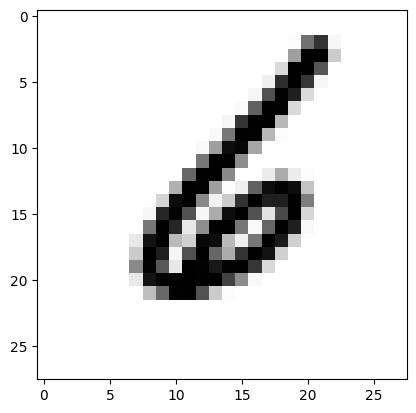

In [43]:
image_index = 999
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

Preprocessing the data

In [44]:
# Reshaping the array to 4-dims
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Converting the type to 'float'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input value (input value range: {0,255})
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Defining the CNN model

In [45]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),padding='same',strides=1, input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model description

In [46]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 5488)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         702,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 704,162 (2.69 MB)

 Trainable params: 704,162 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

Running the CNN model

In [47]:
optimizer = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    )
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8849 - loss: 0.3803 - val_accuracy: 0.9793 - val_loss: 0.0706
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9777 - loss: 0.0737 - val_accuracy: 0.9821 - val_loss: 0.0603
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9840 - loss: 0.0495 - val_accuracy: 0.9842 - val_loss: 0.0533
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9884 - loss: 0.0351 - val_accuracy: 0.9864 - val_loss: 0.0490
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9910 - loss: 0.0265 - val_accuracy: 0.9855 - val_loss: 0.0525


Reference:

[1] [Keras loss functions](https://keras.io/api/losses/)

[2] [Keras optimizers](https://keras.io/api/optimizers/)

[3] [Keras metrics](https://keras.io/api/metrics/)

Evaluate the model

In [48]:
model.metrics_names

['loss', 'compile_metrics']

In [49]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9792 - loss: 0.0630


[0.05100100487470627, 0.9837999939918518]

conv2d_9
[[[ 0.34972942]
  [ 0.1906916 ]
  [-0.58724505]]

 [[ 0.3581103 ]
  [-0.07815097]
  [-0.39920616]]

 [[ 0.13337646]
  [-0.29539594]
  [-0.3309416 ]]]
max_pooling2d_7
flatten_5
dense_11
dropout_4
dense_12


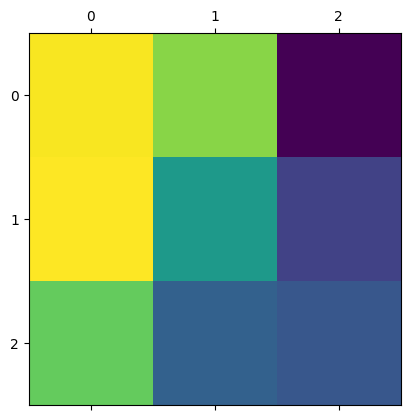

In [50]:
for layer in model.layers:
    print(layer.name)
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    plt.matshow(filters[:,:,:,0].reshape(3,3))
    print(filters[:,:,:,0])

In [51]:
def plotloss(history,both = True):
    plt.plot(history.history['loss'])
    if both:
        plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

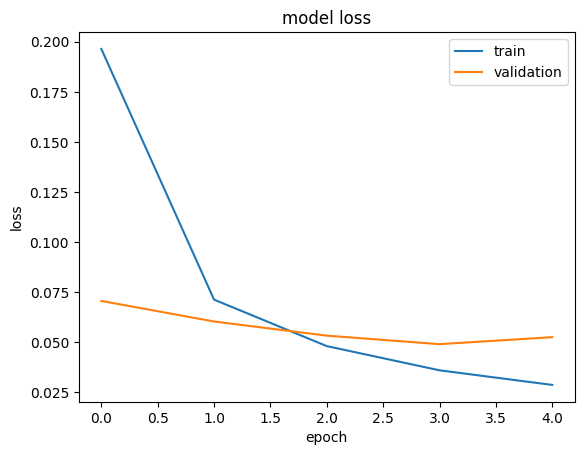

In [52]:
plotloss(history,True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
(1, 10)
0 4.807348e-13
1 1.4137605e-10
2 2.0246954e-08
3 5.011437e-08
4 3.194458e-14
5 4.0571986e-13
6 2.9201157e-18
7 1.0
8 1.3782397e-10
9 3.37452e-08
--------------
7
7


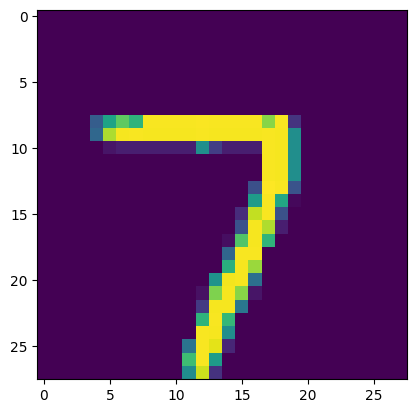

In [53]:
image_index = 3400
plt.imshow(x_test[image_index].reshape(28, 28))#,cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])

## Lab
### Task #1
- Implement LeNet on this task (the final layer should be softmax)
- Plot the loss after each epoch
- Display the kernel/filters of the $1^{st}$ conv layer
- Show the performance
<img src='lenet.png'>

#### Resources
- https://keras.io/
- https://www.tensorflow.org/

Start your code here:
    

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import matplotlib.pyplot as plt

In [55]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshaping and normalizing the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train:', x_train.shape[0])
print('Number of images in x_test:', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


In [56]:
# Building the LeNet model
model_lenet = Sequential()

# Layer 1: Conv + Pooling
model_lenet.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=input_shape, padding='same'))
model_lenet.add(AveragePooling2D(pool_size=(2,2)))

# Layer 2: Conv + Pooling
model_lenet.add(Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))
model_lenet.add(AveragePooling2D(pool_size=(2,2)))

# Fully Connected Layers
model_lenet.add(Flatten())
model_lenet.add(Dense(120, activation='tanh'))
model_lenet.add(Dense(84, activation='tanh'))

# Output Layer
model_lenet.add(Dense(10, activation='softmax'))


In [57]:
# Compiling the model
model_lenet.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Training the model
history_lenet = model_lenet.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluating the model
test_loss, test_acc = model_lenet.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8561 - loss: 0.4758 - val_accuracy: 0.9598 - val_loss: 0.1367
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9652 - loss: 0.1162 - val_accuracy: 0.9701 - val_loss: 0.0958
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9787 - loss: 0.0685 - val_accuracy: 0.9761 - val_loss: 0.0763
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9851 - loss: 0.0479 - val_accuracy: 0.9799 - val_loss: 0.0682
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9874 - loss: 0.0415 - val_accuracy: 0.9827 - val_loss: 0.0627
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9782 - loss: 0.0697
Test accuracy: 0.9818000197410583


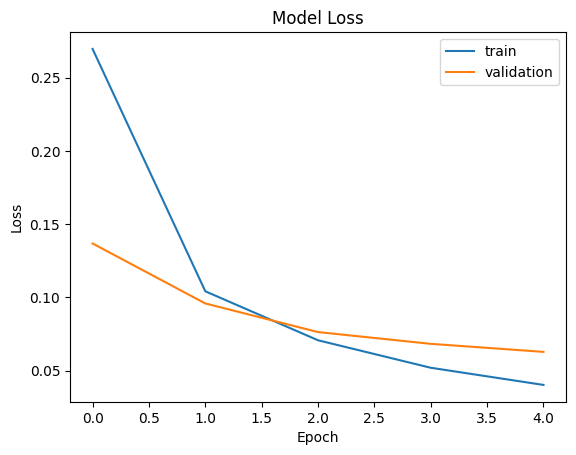

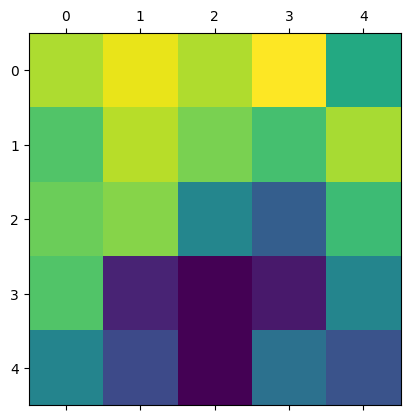

In [58]:
# Function to plot loss
def plotloss(history, both=True):
    plt.plot(history.history['loss'])
    if both:
        plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

# Plotting the loss
plotloss(history_lenet, both=True)

# Displaying the filters of the first convolutional layer
for layer in model_lenet.layers:
    if 'conv2d' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    plt.matshow(filters[:,:,:,0].reshape(5,5))  # Filters of size 5x5
    plt.show()
    break


### Task #2
- Classify images into several categories
- Complete a model to classify each image into the 10 classes described below
- Compile and train the model
- Print the summary of the model
- Evaluate the model
    - Show the model loss and accuracy
    - Plot the train and validation loss
    - For 4 samples from the test set
        - Display the image
        - Print the true label in text
        - Print the output probabilities of all the classes
        - Print the predicted label in text

#### Load the dataset and normalize the pixel values

In [59]:
cifar = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255.0, X_test/255.0

#### Define the output classes

In [60]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### Display sample images

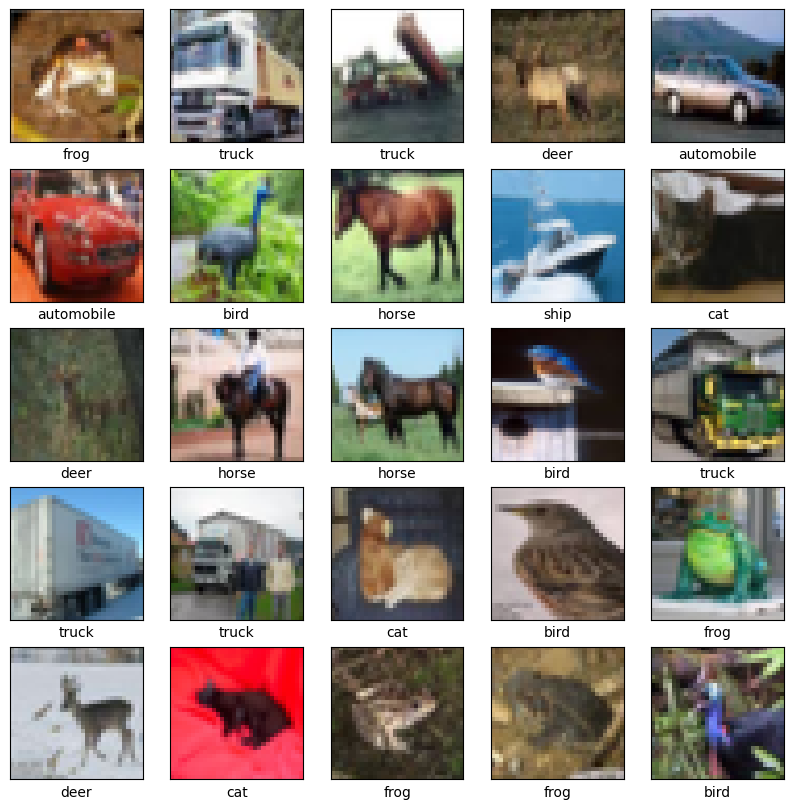

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

#### Build the model

In [62]:
# Building a CNN model for CIFAR-10
model_cifar = Sequential()

# Layer 1: Conv + Pooling
model_cifar.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model_cifar.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2: Conv + Pooling
model_cifar.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cifar.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening and Dense layers
model_cifar.add(Flatten())
model_cifar.add(Dense(128, activation='relu'))
model_cifar.add(Dropout(0.2))

# Output layer
model_cifar.add(Dense(10, activation='softmax'))

# Compile the model
model_cifar.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


#### Train the model and achieve accuracy greater than 75%

- Use validation set

In [63]:
# Train the model
history_cifar = model_cifar.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 46ms/step - accuracy: 0.3621 - loss: 1.7435 - val_accuracy: 0.5740 - val_loss: 1.2137
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.5692 - loss: 1.2090 - val_accuracy: 0.6203 - val_loss: 1.0804
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.6283 - loss: 1.0494 - val_accuracy: 0.6443 - val_loss: 1.0197
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 44ms/step - accuracy: 0.6727 - loss: 0.9303 - val_accuracy: 0.6637 - val_loss: 0.9722
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7106 - loss: 0.8348 - val_accuracy: 0.6827 - val_loss: 0.9096
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.7330 - loss: 0.7683 - val_accuracy: 0.6823 - val_loss: 0.9271
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.7541 - loss: 0.7009 - val_accuracy: 0.7000 - val_loss: 0.8902
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.7781 -

#### Print the model summary

In [64]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 5488)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         702,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,112,488 (8.06 MB)

 Trainable params: 704,162 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,408,326 (5.37 MB)

#### Evaluate the model

- plot training and validation loss
- print accuracy

In [65]:
# Evaluating the model
test_loss_cifar, test_acc_cifar = model_cifar.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc_cifar}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7005 - loss: 0.9487
Test accuracy: 0.6966000199317932


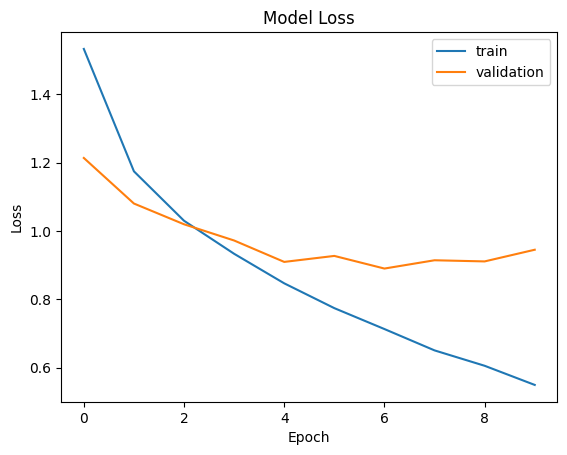

In [66]:
# Plot the training and validation loss
def plotloss(history, both=True):
    plt.plot(history.history['loss'])
    if both:
        plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

# Plotting loss for CIFAR-10
plotloss(history_cifar, both=True)




### Taking 4 samples from the test set
- display the image
- print the true label
- print the output probability distribution of the classes
- print the predicted class

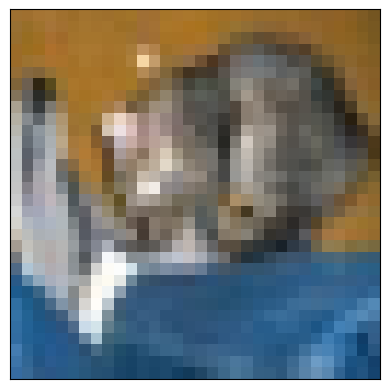

True Label: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Label Probabilities: [[9.5767209e-05 4.3997305e-05 4.1272442e-04 9.6721226e-01 2.7080552e-05
  3.0593891e-02 1.5110191e-03 1.0611543e-05 7.7575649e-05 1.4973311e-05]]
Predicted Label: cat
---------------------------------------


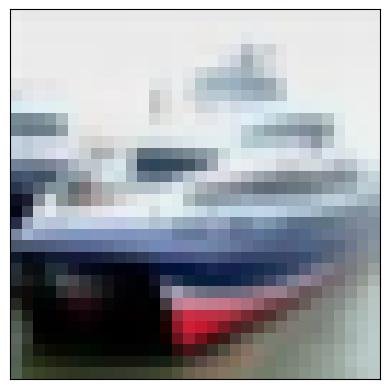

True Label: ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Label Probabilities: [[4.5932186e-04 1.8686534e-01 5.7723089e-09 3.1887187e-10 3.6164478e-11
  6.6942485e-12 9.3837695e-11 4.8527900e-11 8.1260836e-01 6.7071487e-05]]
Predicted Label: ship
---------------------------------------


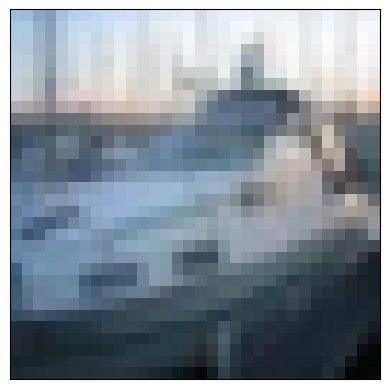

True Label: ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label Probabilities: [[4.90061194e-02 3.39068174e-01 3.90686619e-04 6.77806616e-04
  4.53134824e-04 1.14605886e-04 1.42767129e-03 4.07782820e-04
  5.72093308e-01 3.63606140e-02]]
Predicted Label: ship
---------------------------------------


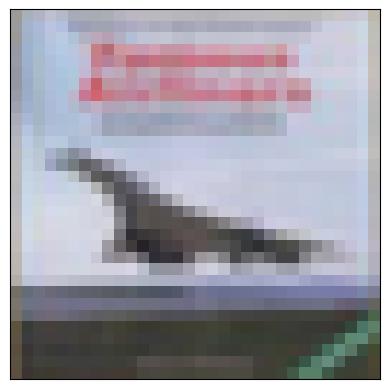

True Label: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label Probabilities: [[9.96434093e-01 3.44222099e-05 1.44940404e-05 3.36692647e-05
  2.33094543e-05 8.94998848e-08 1.01953894e-07 2.08773976e-08
  3.42187774e-03 3.79037774e-05]]
Predicted Label: airplane
---------------------------------------


In [67]:
# Display 4 samples from the test set along with true and predicted labels
for i in range(4):
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

    # True label
    print("True Label:", class_names[y_test[i][0]])

    # Predicted label and probabilities
    pred = model_cifar.predict(X_test[i].reshape(1, 32, 32, 3))
    print("Predicted Label Probabilities:", pred)
    print("Predicted Label:", class_names[np.argmax(pred)])
    print('---------------------------------------')
